<a href="https://colab.research.google.com/github/ravitejanalla/Oasis-infobyte-internship/blob/main/infobyte_task4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [105]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import svm 
import matplotlib.pyplot as plt
import seaborn as sns


In [106]:
sp= pd.read_csv('spam.csv',encoding=('ISO-8859-1'))
sp.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [107]:
sp.shape

(5572, 5)

In [108]:
sp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [109]:
sp.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [110]:
sp.describe()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,5572,5572,50,12,6
unique,2,5169,43,10,5
top,ham,"Sorry, I'll call later","bt not his girlfrnd... G o o d n i g h t . . .@""","MK17 92H. 450Ppw 16""","GNT:-)"""
freq,4825,30,3,2,2


In [111]:
sp.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
5567    False
5568    False
5569    False
5570    False
5571    False
Length: 5572, dtype: bool

In [112]:
sp.duplicated().sum()

403

In [113]:
sp.drop_duplicates(inplace=True)

In [114]:
sp.tail()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN
5571,ham,Rofl. Its true to its name,NaN,NaN,NaN


In [115]:
sp.rename(columns=
          {'v1':'Tareget','v2':'Text'},inplace=True)

In [116]:
sp.head()

,Tareget,Text,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [117]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [118]:
sp['Tareget']=le.fit_transform(sp['Tareget'])
sp['Tareget']

0       0
1       0
2       1
3       0
4       0
       ..
5567    1
5568    0
5569    0
5570    0
5571    0
Name: Tareget, Length: 5169, dtype: int64

In [119]:
sp.tail()

,Tareget,Text,Unnamed: 2,Unnamed: 3,Unnamed: 4
5567,1,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,0,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,0,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,0,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN
5571,0,Rofl. Its true to its name,NaN,NaN,NaN


In [120]:
sp.isnull()

,Tareget,Text,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,False,False,True,True,True
1,False,False,True,True,True
2,False,False,True,True,True
3,False,False,True,True,True
4,False,False,True,True,True
...,...,...,...,...,...
5567,False,False,True,True,True
5568,False,False,True,True,True
5569,False,False,True,True,True
5570,False,False,True,True,True


In [121]:
sp.isnull().sum()

Tareget          0
Text             0
Unnamed: 2    5126
Unnamed: 3    5159
Unnamed: 4    5164
dtype: int64

([<matplotlib.patches.Wedge at 0x7f391e1396a0>,
 [Text(-1.0144997251399075, 0.42519443516002464, 'ham'),
  Text(1.014499764949479, -0.4251943401757036, 'spam')],
 [Text(-0.5533634864399495, 0.23192423736001339, '87.37'),
  Text(0.5533635081542612, -0.23192418555038377, '12.63')])

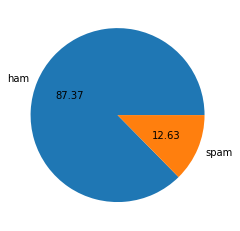

In [122]:
plt.pie(sp['Tareget'].value_counts(),labels=['ham','spam'],autopct="%0.2f")

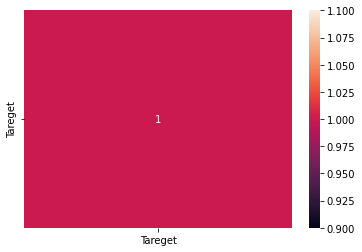

In [123]:
sns.heatmap(sp.corr(),annot=True)

In [124]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import svm

In [125]:
X=sp['Text'].values
y=sp['Tareget'].values

In [126]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.8,random_state=2)

In [127]:
cv=CountVectorizer()
X_train=cv.fit_transform(X_train)
X_test=cv.transform(X_test)

In [132]:
from sklearn.svm import SVC
classifier =SVC(kernel='rbf',random_state=0)
classifier.fit(X_train,y_train)


SVC(random_state=0)

In [133]:
classifier.score(X_test,y_test)

0.9632495164410058